In [2]:
import joblib

data_records = joblib.load("data_records.pkl")

In [3]:
from sklearn.cluster import KMeans
import numpy as np

In [4]:
# Assuming images is a list of 550 grayscale images, each with dimensions 100x100 pixels
# Flatten each image and store them in X_images

images = data_records["images"]
X_images = np.array([image.flatten() for image in images])

In [5]:
X_images.shape

(550, 252000)

In [18]:
y_fat_percent = np.array(data_records["fat"])
# Assuming you have normalized image data stored in X_images and fat percentage in y_fat_percent
# X_images should be a 2D array with each row representing a flattened image
# y_fat_percent should be a 1D array or list of fat percentage values

# Combine image data and fat percentage into a single feature matrix
# Assuming X_images and y_fat_percent have the same number of samples
X_combined = np.column_stack((X_images, y_fat_percent))

# Choose the number of clusters (k)
k = 4  # Adjust this based on your dataset and requirements

# Initialize and fit KMeans clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_combined)

KMeans(n_clusters=4, random_state=42)

In [ ]:
def assign_label(fat_percent):
    if fat_percent < 5:
        return "Normal"
    elif 5 <= fat_percent < 34:
        return "Mild Steatosis"
    elif 34 <= fat_percent < 66:
        return "Moderate Steatosis"
    else:
        return "Severe Steatosis"

In [27]:
# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate the majority fat percentage within each cluster
cluster_fat_percent = {}
for cluster in range(k):
    cluster_indices = np.where(cluster_labels == cluster)[0]

    fat_percent_in_cluster = y_fat_percent[cluster_indices]
    majority_fat_percent = np.median(
        fat_percent_in_cluster
    )  # Using median as the majority fat percentage
    cluster_fat_percent[cluster] = majority_fat_percent

# Assign labels to each data point based on cluster and majority fat percentage
data_labels = []
for idx, cluster_label in enumerate(cluster_labels):
    majority_fat_percent = cluster_fat_percent[cluster_label]
    label = assign_label(majority_fat_percent)
    data_labels.append(label)

# Now data_labels contains the assigned labels for each data point

c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [28]:
cluster_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

true_labels = [assign_label(fat_percent) for fat_percent in data_records["fat"]]


# Calculate accuracy
accuracy = accuracy_score(true_labels, data_labels)
print("Accuracy:", accuracy)

# Generate confusion matrix
conf_matrix = confusion_matrix(true_labels, data_labels)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
cls_report = classification_report(true_labels, data_labels)
print("Classification Report:")
print(cls_report)

Accuracy: 0.4527272727272727
Confusion Matrix:
[[130  30  40   0]
 [ 35  20  25   0]
 [ 60  11  99   0]
 [ 40  60   0   0]]
Classification Report:
                    precision    recall  f1-score   support

    Mild Steatosis       0.49      0.65      0.56       200
Moderate Steatosis       0.17      0.25      0.20        80
            Normal       0.60      0.58      0.59       170
  Severe Steatosis       0.00      0.00      0.00       100

          accuracy                           0.45       550
         macro avg       0.31      0.37      0.34       550
      weighted avg       0.39      0.45      0.42       550



c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\LWARRIER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Silhouette Score: 0.04520114122632357


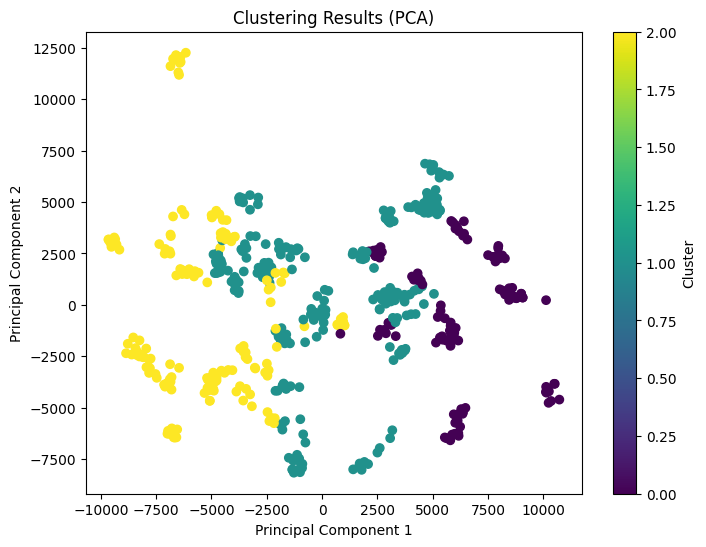

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X contains your preprocessed image data
# Perform clustering using KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_images)

# Compute silhouette score
silhouette_avg = silhouette_score(X_images, cluster_labels)
print("Silhouette Score:", silhouette_avg)

# Visualize clustered data using PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_images)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Clustering Results (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()

In [32]:
import pandas as pd

df = pd.DataFrame(data_records)

# Define the bin edges
bin_edges = [0, 5, 33, 63, float("inf")]

# Create bins for the fat percentages
bins = pd.cut(
    df["fat"], bins=bin_edges, right=False, labels=["0-5", "5-33", "33-63", ">63"]
)

# Count the occurrences in each bin
bin_counts = bins.value_counts().sort_index()

# Print the number of occurrences in each range
for bin_label, count in bin_counts.items():
    print(f"{bin_label}: {count}")

0-5: 170
5-33: 200
33-63: 80
>63: 100


In [35]:
pca = PCA(n_components=0.90)  # Choose the number of components to explain 95% of the variance
X_pca = pca.fit_transform(X_combined)

# Choose the number of clusters (k)
k = 4  # Adjust this based on your dataset and requirements

# Initialize and fit KMeans clustering model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Calculate the majority fat percentage within each cluster
cluster_fat_percent = {}
for cluster in range(k):
    cluster_indices = np.where(cluster_labels == cluster)[0]

    fat_percent_in_cluster = y_fat_percent[cluster_indices]
    majority_fat_percent = np.median(fat_percent_in_cluster)  # Using median as the majority fat percentage
    cluster_fat_percent[cluster] = majority_fat_percent


# Assign labels to each data point based on cluster and majority fat percentage
data_labels = []
for idx, cluster_label in enumerate(cluster_labels):
    majority_fat_percent = cluster_fat_percent[cluster_label]
    label = assign_label(majority_fat_percent)
    data_labels.append(label)

# Now data_labels contains the assigned labels for each data point

# Calculate accuracy
accuracy = np.mean(np.array(data_labels) == np.array(true_labels))  # Replace true_labels with the actual labels
print("Accuracy:", accuracy)


Accuracy: 0.43272727272727274
